In [ ]:
pip install ucimlrepo


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import GRU, Dense, Dropout


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

 Forecasting + Shedding

In [ ]:

# 📌 Step 1: Load Dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets
df = pd.concat([X, y], axis=1)

# 📌 Step 2: Date-Time Handling
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

# 📌 Step 3: Handle Missing Values
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# 📌 Step 4: Feature Engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday

# 📌 Step 5: Reduce dataset for memory
df = df.iloc[:50000]

# 📌 Step 6: Normalize data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# 📌 Step 7: Define inputs & outputs
X_processed = df_scaled.drop(columns=['Global_active_power'])
y_processed = df_scaled['Global_active_power']

# 📌 Step 8: Create Sequences
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

TIME_STEPS = 12
X_seq, y_seq = create_sequences(X_processed.values, y_processed.values, time_steps=TIME_STEPS)

# 📌 Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 17ms/step - loss: 0.2036 - mae: 0.2928 - val_loss: 0.0852 - val_mae: 0.1470
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - loss: 0.1034 - mae: 0.1959 - val_loss: 0.0811 - val_mae: 0.1535
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - loss: 0.0932 - mae: 0.1822 - val_loss: 0.0771 - val_mae: 0.1393
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - loss: 0.0892 - mae: 0.1762 - val_loss: 0.0705 - val_mae: 0.1266
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - loss: 0.0847 - mae: 0.1700 - val_loss: 0.0681 - val_mae: 0.1244
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - loss: 0.0801 - mae: 0.1657 - val_loss: 0.0713 - val_mae: 0.1414
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 17ms/step - loss: 0.0817 - mae: 0.1642 - val_loss: 0.0675 - val_mae: 0.1266
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - loss: 0.0745 - mae: 0.1577 - val_loss: 0.0630 - val_mae: 0.1254
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━

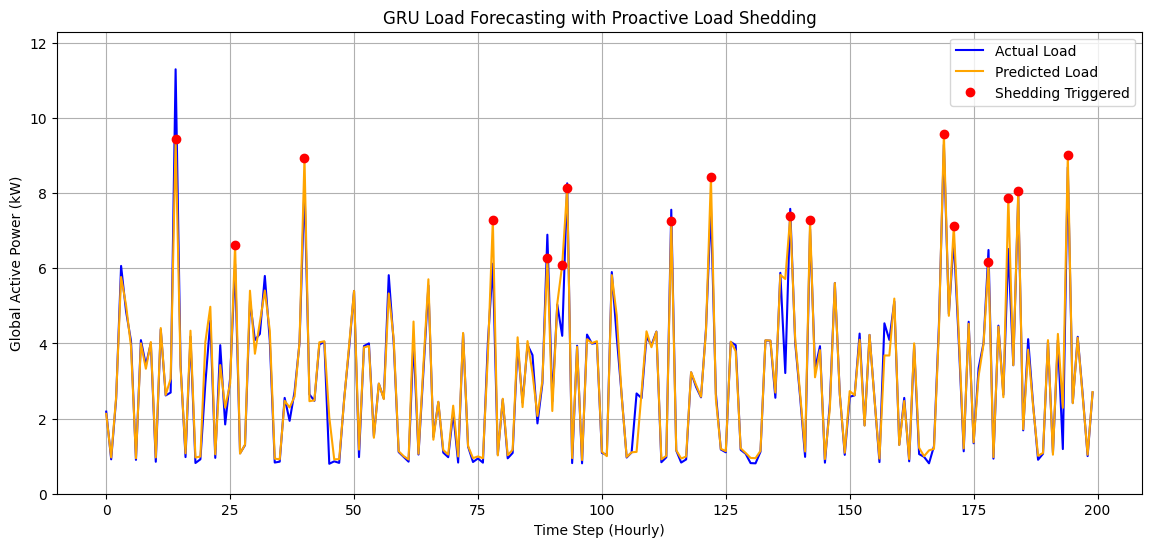

In [ ]:

# Build model (same optimized GRU model)
model = Sequential([
    GRU(32, return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[2])),
    Dropout(0.2),
    GRU(16, return_sequences=False),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict on test set
y_pred = model.predict(X_test)

# Inverse scaling (combine last input features with prediction and target for inverse transform)
X_test_last = X_test[:, -1, :]
y_pred_full = np.hstack([X_test_last, y_pred])
y_test_full = np.hstack([X_test_last, y_test.reshape(-1, 1)])

# Columns used in scaler
full_columns = list(df.drop(columns=['Global_active_power']).columns) + ['Global_active_power']

# Convert to dataframe for inverse transform
y_pred_df = pd.DataFrame(y_pred_full, columns=full_columns)
y_test_df = pd.DataFrame(y_test_full, columns=full_columns)

# Inverse transform
y_pred_actual = scaler.inverse_transform(y_pred_df)[:, -1]
y_test_actual = scaler.inverse_transform(y_test_df)[:, -1]

# Evaluation metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MAE  : {mae:.3f} kW")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f} kW")
print(f"R² Score : {r2:.3f}")

# Proactive Load Shedding logic
shed_threshold = 6  # kW threshold to trigger shedding
shed = y_pred_actual > shed_threshold

# Plot results for first 200 samples
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual[:200], label='Actual Load', color='blue')
plt.plot(y_pred_actual[:200], label='Predicted Load', color='orange')
plt.plot(np.where(shed[:200], y_pred_actual[:200], np.nan), 'ro', label='Shedding Triggered')
plt.title('GRU Load Forecasting with Proactive Load Shedding')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Global Active Power (kW)')
plt.ylim(0, max(np.max(y_test_actual[:200]), np.max(y_pred_actual[:200])) + 1)
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - loss: 0.2522 - mae: 0.3173 - val_loss: 0.1134 - val_mae: 0.1894
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - loss: 0.1178 - mae: 0.2029 - val_loss: 0.0930 - val_mae: 0.1724
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - loss: 0.1011 - mae: 0.1823 - val_loss: 0.0913 - val_mae: 0.1904
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 33s 13ms/step - loss: 0.0856 - mae: 0.1650 - val_loss: 0.0801 - val_mae: 0.1757
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - loss: 0.0840 - mae: 0.1603 - val_loss: 0.0873 - val_mae: 0.1978
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - loss: 0.0777 - mae: 0.1518 - val_loss: 0.0752 - val_mae: 0.1758
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - loss: 0.0737 - mae: 0.1491 - val_loss: 0.0837 - val_mae: 0.2010
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0721 - mae: 0.1463 - val_loss: 0.0792 - val_mae: 0.1925
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


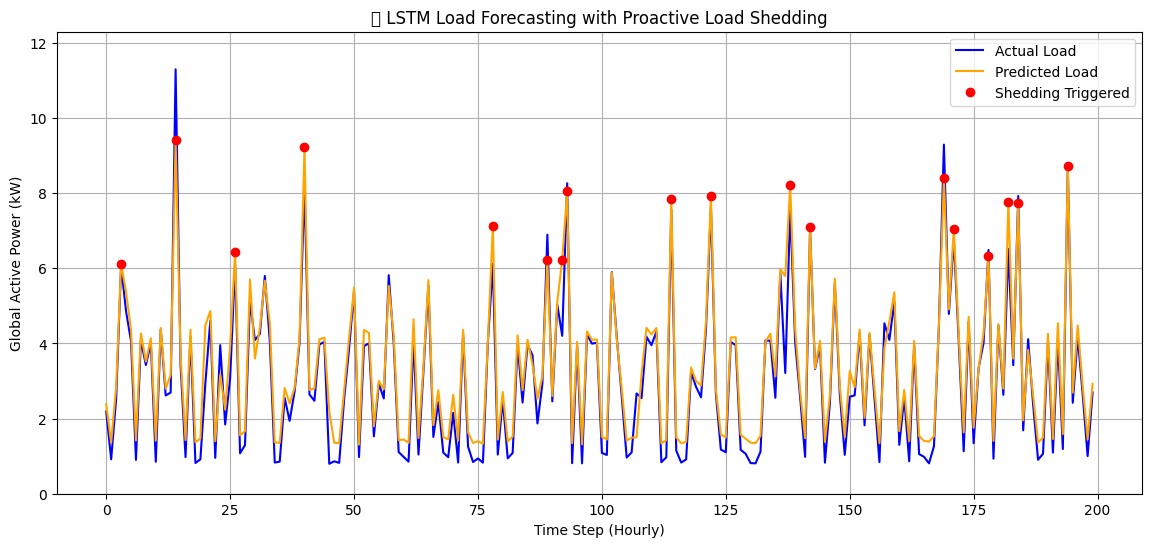

In [ ]:

# Build LSTM Model
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(TIME_STEPS, X_train.shape[2])),
    Dropout(0.2),
    LSTM(16, return_sequences=False),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Predict
y_pred = model.predict(X_test)

# Inverse Transform Predictions
X_test_last = X_test[:, -1, :]
y_pred_full = np.hstack([X_test_last, y_pred])
y_test_full = np.hstack([X_test_last, y_test.reshape(-1, 1)])

full_columns = list(df.drop(columns=['Global_active_power']).columns) + ['Global_active_power']
y_pred_df = pd.DataFrame(y_pred_full, columns=full_columns)
y_test_df = pd.DataFrame(y_test_full, columns=full_columns)

y_pred_actual = scaler.inverse_transform(y_pred_df)[:, -1]
y_test_actual = scaler.inverse_transform(y_test_df)[:, -1]

# Evaluation Metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"\n🔍 Evaluation Metrics:")
print(f"MAE  : {mae:.3f} kW")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f} kW")
print(f"R² Score : {r2:.3f}")

# Proactive Load Shedding
shed_threshold = 6  # in kW
shed = y_pred_actual > shed_threshold

#  Visualization
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual[:200], label='Actual Load', color='blue')
plt.plot(y_pred_actual[:200], label='Predicted Load', color='orange')
plt.plot(np.where(shed[:200], y_pred_actual[:200], np.nan), 'ro', label='Shedding Triggered')
plt.title('🔋 LSTM Load Forecasting with Proactive Load Shedding')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Global Active Power (kW)')
plt.ylim(0, max(np.max(y_test_actual[:200]), np.max(y_pred_actual[:200])) + 1)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 95s 35ms/step - loss: 0.2090 - mae: 0.2848 - val_loss: 0.0972 - val_mae: 0.1595
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 122s 27ms/step - loss: 0.1094 - mae: 0.1948 - val_loss: 0.0886 - val_mae: 0.1637
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - loss: 0.0993 - mae: 0.1803 - val_loss: 0.0760 - val_mae: 0.1500
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - loss: 0.0852 - mae: 0.1633 - val_loss: 0.0731 - val_mae: 0.1593
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - loss: 0.0805 - mae: 0.1566 - val_loss: 0.0680 - val_mae: 0.1444
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 0.0755 - mae: 0.1496 - val_loss: 0.0727 - val_mae: 0.1700
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 80s 20ms/step - loss: 0.0743 - mae: 0.1471 - val_loss: 0.0693 - val_mae: 0.1637
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - loss: 0.0677 - mae: 0.1385 - val_loss: 0.0684 - val_mae: 0.1588
Epoch 9/10
2500/2500 ━━

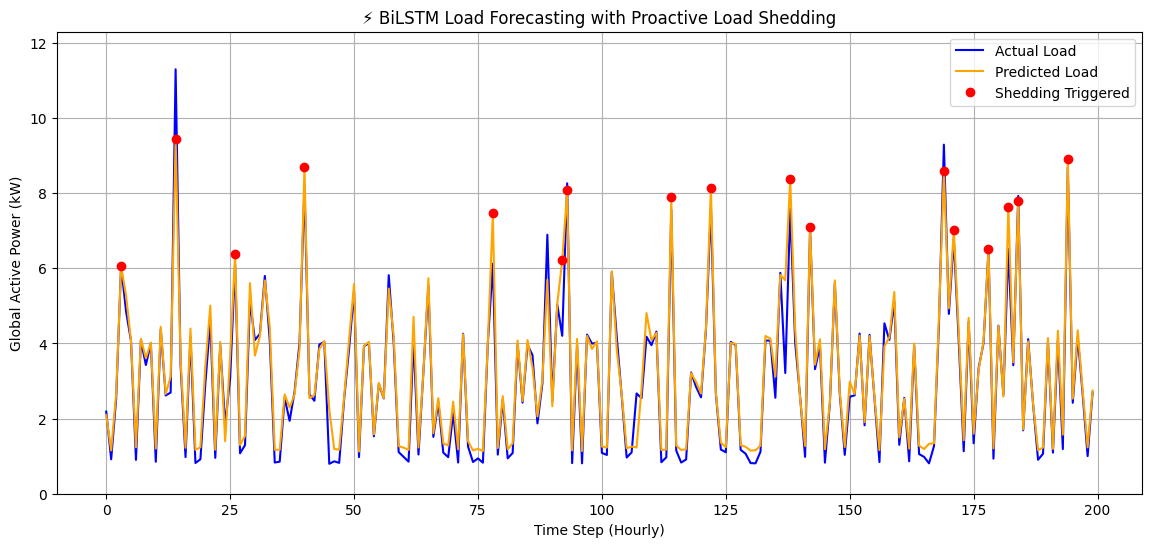

In [ ]:

#  Build BiLSTM Model
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=True), input_shape=(TIME_STEPS, X_train.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(16, return_sequences=False)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#  Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Predict
y_pred = model.predict(X_test)

#  Inverse Transform Predictions
X_test_last = X_test[:, -1, :]
y_pred_full = np.hstack([X_test_last, y_pred])
y_test_full = np.hstack([X_test_last, y_test.reshape(-1, 1)])

full_columns = list(df.drop(columns=['Global_active_power']).columns) + ['Global_active_power']
y_pred_df = pd.DataFrame(y_pred_full, columns=full_columns)
y_test_df = pd.DataFrame(y_test_full, columns=full_columns)

y_pred_actual = scaler.inverse_transform(y_pred_df)[:, -1]
y_test_actual = scaler.inverse_transform(y_test_df)[:, -1]

#  Evaluation Metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"\n🔍 Evaluation Metrics:")
print(f"MAE  : {mae:.3f} kW")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f} kW")
print(f"R² Score : {r2:.3f}")

#  Proactive Load Shedding
shed_threshold = 6  # in kW
shed = y_pred_actual > shed_threshold

#  Visualization (first 200 test points)
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual[:200], label='Actual Load', color='blue')
plt.plot(y_pred_actual[:200], label='Predicted Load', color='orange')
plt.plot(np.where(shed[:200], y_pred_actual[:200], np.nan), 'ro', label='Shedding Triggered')
plt.title('⚡ BiLSTM Load Forecasting with Proactive Load Shedding')
plt.xlabel('Time Step (Hourly)')
plt.ylabel('Global Active Power (kW)')
plt.ylim(0, max(np.max(y_test_actual[:200]), np.max(y_pred_actual[:200])) + 1)
plt.legend()
plt.grid(True)
plt.show()


4 in 1 Forecasting + Shedding

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step


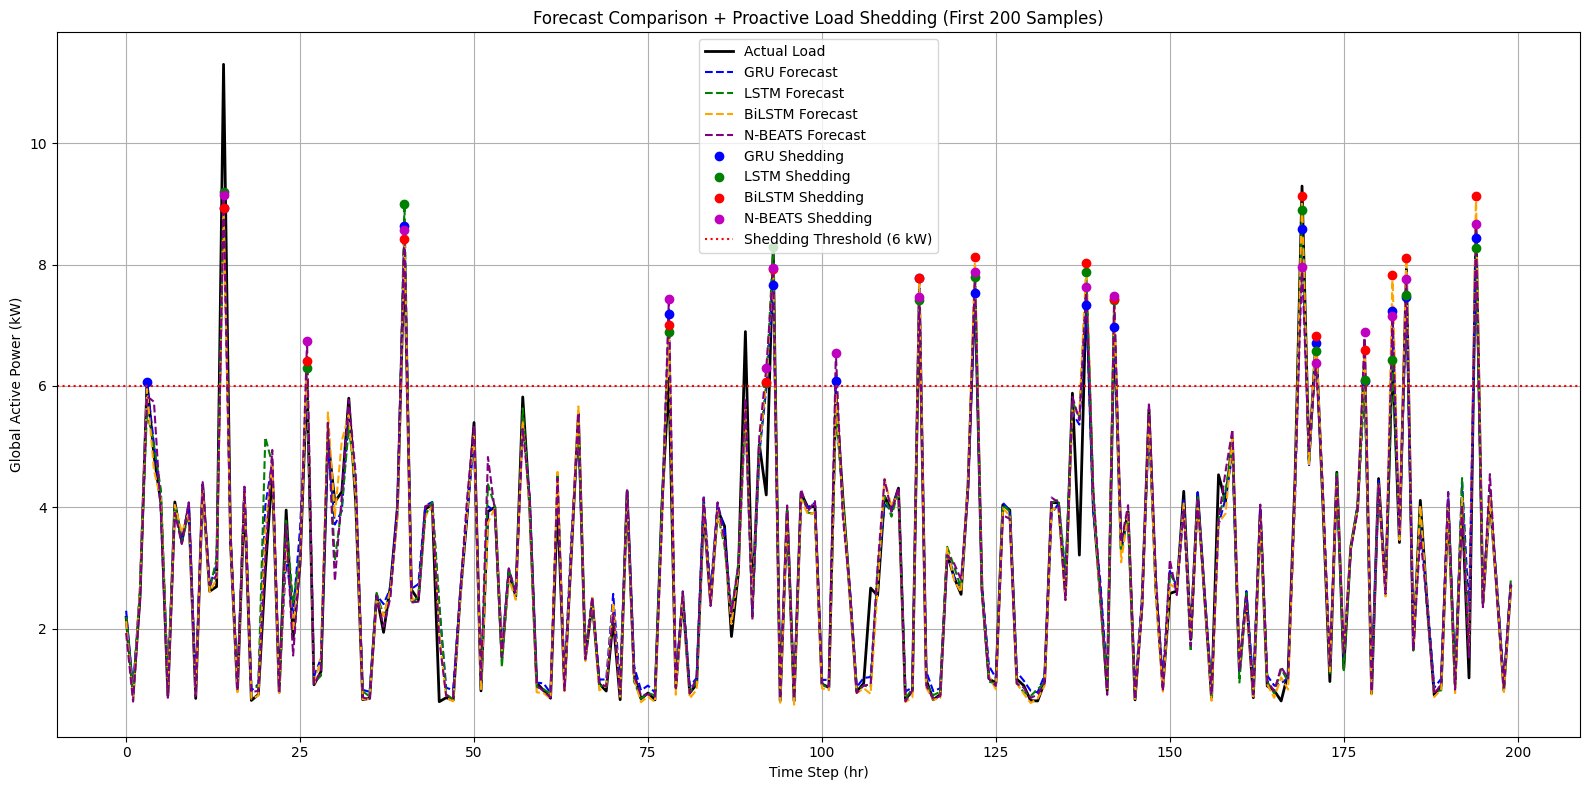

In [ ]:
# 📌 Full Unified Code for GRU, LSTM, BiLSTM, N-BEATS with Forecasting + Shedding Plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Dropout
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Fetch dataset
data = fetch_ucirepo(id=235)
X = data.data.features
y = data.data.targets
df = pd.concat([X, y], axis=1)

# Datetime processing
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)

# Numeric conversion and fill missing
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# Feature engineering
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday

# Reduce dataset
df = df.iloc[:50000]

# Normalize
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

# Prepare features and target
X_data = df_scaled.drop(columns=['Global_active_power'])
y_data = df_scaled['Global_active_power']

# Create sequences
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

X_seq, y_seq = create_sequences(X_data.values, y_data.values, time_steps=12)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define model builder
def build_and_train(model_type='GRU'):
    model = Sequential()
    if model_type == 'GRU':
        model.add(GRU(32, return_sequences=True, input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(GRU(16))
    elif model_type == 'LSTM':
        model.add(LSTM(32, return_sequences=True, input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(16))
    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(16)))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
    return model

# Train all models
gru_model = build_and_train('GRU')
lstm_model = build_and_train('LSTM')
bilstm_model = build_and_train('BiLSTM')

# Simple N-BEATS like dense model (not real N-BEATS block)
def build_nbeats():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(12 * X_train.shape[2],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

X_train_nbeats = X_train.reshape((X_train.shape[0], -1))
X_test_nbeats = X_test.reshape((X_test.shape[0], -1))
nbeats_model = build_nbeats()
nbeats_model.fit(X_train_nbeats, y_train, epochs=10, batch_size=16, verbose=0)

# Inverse scaler setup
scaler = StandardScaler().fit(df)
full_cols = list(df.columns)
X_last = X_test[:, -1, :]

# Helper for prediction + inverse

def inverse_predictions(model, X, model_type='RNN'):
    if model_type == 'NBEATS':
        pred = model.predict(X.reshape((X.shape[0], -1)))
    else:
        pred = model.predict(X)
    pred_full = np.hstack([X[:, -1, :], pred])
    test_full = np.hstack([X[:, -1, :], y_test.reshape(-1, 1)])
    y_pred_actual = scaler.inverse_transform(pd.DataFrame(pred_full, columns=full_cols))[:, -1]
    y_test_actual = scaler.inverse_transform(pd.DataFrame(test_full, columns=full_cols))[:, -1]
    return y_pred_actual, y_test_actual

# Forecast and evaluate
pred_gru, y_actual = inverse_predictions(gru_model, X_test)
pred_lstm, _ = inverse_predictions(lstm_model, X_test)
pred_bilstm, _ = inverse_predictions(bilstm_model, X_test)
pred_nbeats, _ = inverse_predictions(nbeats_model, X_test, model_type='NBEATS')

# Shedding logic
threshold = 6
shed_gru = pred_gru > threshold
shed_lstm = pred_lstm > threshold
shed_bilstm = pred_bilstm > threshold
shed_nbeats = pred_nbeats > threshold

# Plot all in one
y_actual = y_actual[:200]
pred_gru = pred_gru[:200]
pred_lstm = pred_lstm[:200]
pred_bilstm = pred_bilstm[:200]
pred_nbeats = pred_nbeats[:200]
shed_gru = shed_gru[:200]
shed_lstm = shed_lstm[:200]
shed_bilstm = shed_bilstm[:200]
shed_nbeats = shed_nbeats[:200]

plt.figure(figsize=(16, 8))
plt.plot(y_actual, label='Actual Load', color='black', linewidth=2)
plt.plot(pred_gru, '--', label='GRU Forecast', color='blue')
plt.plot(pred_lstm, '--', label='LSTM Forecast', color='green')
plt.plot(pred_bilstm, '--', label='BiLSTM Forecast', color='orange')
plt.plot(pred_nbeats, '--', label='N-BEATS Forecast', color='purple')

plt.plot(np.where(shed_gru, pred_gru, np.nan), 'bo', label='GRU Shedding')
plt.plot(np.where(shed_lstm, pred_lstm, np.nan), 'go', label='LSTM Shedding')
plt.plot(np.where(shed_bilstm, pred_bilstm, np.nan), 'ro', label='BiLSTM Shedding')
plt.plot(np.where(shed_nbeats, pred_nbeats, np.nan), 'mo', label='N-BEATS Shedding')

plt.title('Forecast Comparison + Proactive Load Shedding (First 200 Samples)')
plt.axhline(y=threshold, linestyle='dotted', color='red', label='Shedding Threshold (6 kW)')
plt.xlabel('Time Step (hr)')
plt.ylabel('Global Active Power (kW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install ucimlrepo tensorflow scikit-learn matplotlib pandas


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Dropout
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data = fetch_ucirepo(id=235)
X = data.data.features
y = data.data.targets
df = pd.concat([X, y], axis=1)
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

# Time features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday

# Limit data
df = df.iloc[:50000]

# Normalize
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Features & target
X_data = df_scaled.drop(columns=['Global_active_power'])
y_data = df_scaled['Global_active_power']

# Create time sequences
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs, dtype=np.float32), np.array(ys, dtype=np.float32)

X_seq, y_seq = create_sequences(X_data.values, y_data.values, time_steps=12)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Model builder
def build_and_train(model_type='GRU'):
    model = Sequential()
    if model_type == 'GRU':
        model.add(GRU(32, return_sequences=True, input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(GRU(16))
    elif model_type == 'LSTM':
        model.add(LSTM(32, return_sequences=True, input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(LSTM(16))
    elif model_type == 'BiLSTM':
        model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=(12, X_train.shape[2])))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(16)))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
    return model

# Train models
gru_model = build_and_train('GRU')
lstm_model = build_and_train('LSTM')
bilstm_model = build_and_train('BiLSTM')

# Simple N-BEATS style dense model
def build_nbeats():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(12 * X_train.shape[2],)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

X_train_nbeats = X_train.reshape((X_train.shape[0], -1))
X_test_nbeats = X_test.reshape((X_test.shape[0], -1))
nbeats_model = build_nbeats()
nbeats_model.fit(X_train_nbeats, y_train, epochs=10, batch_size=16, verbose=0)

# Prediction + inverse transform
def inverse_predictions(model, X, model_type='RNN'):
    if model_type == 'NBEATS':
        pred = model.predict(X.reshape((X.shape[0], -1)), verbose=0)
    else:
        pred = model.predict(X, verbose=0)
    pred_full = np.hstack([X[:, -1, :], pred])
    test_full = np.hstack([X[:, -1, :], y_test.reshape(-1, 1)])
    y_pred_actual = scaler.inverse_transform(pd.DataFrame(pred_full, columns=df.columns))[:, -1]
    y_test_actual = scaler.inverse_transform(pd.DataFrame(test_full, columns=df.columns))[:, -1]
    return y_pred_actual, y_test_actual

# Evaluation helper
def evaluate_model(pred, actual, name):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, pred)

    threshold = 6
    actual_shed = actual > threshold
    pred_shed = pred > threshold
    tn, fp, fn, tp = confusion_matrix(actual_shed, pred_shed).ravel()
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0

    return {
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2,
        'Shedding_Events': sum(pred_shed),
        'Precision': precision,
        'Recall': recall
    }

# Run evaluations
pred_gru, y_actual = inverse_predictions(gru_model, X_test)
pred_lstm, _ = inverse_predictions(lstm_model, X_test)
pred_bilstm, _ = inverse_predictions(bilstm_model, X_test)
pred_nbeats, _ = inverse_predictions(nbeats_model, X_test, model_type='NBEATS')

results = [
    evaluate_model(pred_gru, y_actual, 'GRU'),
    evaluate_model(pred_lstm, y_actual, 'LSTM'),
    evaluate_model(pred_bilstm, y_actual, 'BiLSTM'),
    evaluate_model(pred_nbeats, y_actual, 'N-BEATS')
]

df_eval = pd.DataFrame(results)
print(df_eval)


     Model       MAE      RMSE        R2  Shedding_Events  Precision    Recall
0      GRU  0.275415  0.511609  0.934060              636   0.863208  0.705656
1     LSTM  0.379214  0.549158  0.924025              686   0.851312  0.750643
2   BiLSTM  0.291597  0.510554  0.934332              610   0.890164  0.697943
3  N-BEATS  0.302547  0.524795  0.930617              603   0.880597  0.682519
